# Taller 1

#Ana Maria García

#Dataset: "Sick"

In [1]:
# Carga de librerías y lectura del archivo que contiene los datos
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

#union del conjunto de entrenamiento y de prueba
urlData="https://archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/sick.data"
urlTest ="https://archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/sick.test"

datos = pd.read_csv(urlData, header=None, na_values="?")
test = pd.read_csv(urlTest, header=None, na_values="?")
data = pd.concat([datos, test])

data.columns = ['age', 'sex', 'on-thyroxine', 'query-on-thyroxine', 'on-antithyroid-medication', 'sick', 'pregnant',
              'thyroid-surgery', 'I131-treatment', 'query-hypothyroid', 'query-hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary',
               'psych','TSH-measured','TSH','T3-measured','T3','TT4-measured','TT4','T4U-measured','T4U','FTI-measured','FTI',
                'TBG-measured','TBG','referral-source','sick-negative.|classes']
data

,age,sex,on-thyroxine,query-on-thyroxine,on-antithyroid-medication,sick,pregnant,thyroid-surgery,I131-treatment,query-hypothyroid,...,TT4-measured,TT4,T4U-measured,T4U,FTI-measured,FTI,TBG-measured,TBG,referral-source,sick-negative.|classes
0,41.0,F,f,f,f,f,f,f,f,f,...,t,125.0,t,1.14,t,109.0,f,NaN,SVHC,negative.|3733
1,23.0,F,f,f,f,f,f,f,f,f,...,t,102.0,f,NaN,f,NaN,f,NaN,other,negative.|1442
2,46.0,M,f,f,f,f,f,f,f,f,...,t,109.0,t,0.91,t,120.0,f,NaN,other,negative.|2965
3,70.0,F,t,f,f,f,f,f,f,f,...,t,175.0,f,NaN,f,NaN,f,NaN,other,negative.|806
4,70.0,F,f,f,f,f,f,f,f,f,...,t,61.0,t,0.87,t,70.0,f,NaN,SVI,negative.|2807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,30.0,F,f,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,f,NaN,other,negative.|2924
968,68.0,F,f,f,f,f,f,f,f,f,...,t,124.0,t,1.08,t,114.0,f,NaN,SVI,negative.|974
969,74.0,F,f,f,f,f,f,f,f,f,...,t,112.0,t,1.07,t,105.0,f,NaN,other,negative.|1493
970,72.0,M,f,f,f,f,f,f,f,f,...,t,82.0,t,0.94,t,87.0,f,NaN,SVI,negative.|252


In [2]:
#Cuál es el número de registros?
#Cuál es el número de atributos?
shape = data.shape
shape

(3772, 30)

In [3]:
#Cual es el tipo de los atributos?
data. dtypes

age                          float64
sex                           object
on-thyroxine                  object
query-on-thyroxine            object
on-antithyroid-medication     object
sick                          object
pregnant                      object
thyroid-surgery               object
I131-treatment                object
query-hypothyroid             object
query-hyperthyroid            object
lithium                       object
goitre                        object
tumor                         object
hypopituitary                 object
psych                         object
TSH-measured                  object
TSH                          float64
T3-measured                   object
T3                           float64
TT4-measured                  object
TT4                          float64
T4U-measured                  object
T4U                          float64
FTI-measured                  object
FTI                          float64
TBG-measured                  object
T

In [4]:
#Medidas de centralidad y desviación para atributos numéricos:
data.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG
count,3771.000000,3403.000000,3003.000000,3541.000000,3385.000000,3387.000000,0.0
mean,51.735879,5.086766,2.013500,108.319345,0.995000,110.469649,NaN
std,20.084958,24.521470,0.827434,35.604248,0.195457,33.089698,NaN
min,1.000000,0.005000,0.050000,2.000000,0.250000,2.000000,NaN
25%,36.000000,0.500000,1.600000,88.000000,0.880000,93.000000,NaN
50%,54.000000,1.400000,2.000000,103.000000,0.980000,107.000000,NaN
75%,67.000000,2.700000,2.400000,124.000000,1.080000,124.000000,NaN
max,455.000000,530.000000,10.600000,430.000000,2.320000,395.000000,NaN


In [5]:
# Cual es el máximo de datos faltantes en un mismo registro?
max(data.isnull().sum(axis=1))

7

In [6]:
#Cuantos datos faltantes hay por cada atributo?
data.isnull().sum()

age                             1
sex                           150
on-thyroxine                    0
query-on-thyroxine              0
on-antithyroid-medication       0
sick                            0
pregnant                        0
thyroid-surgery                 0
I131-treatment                  0
query-hypothyroid               0
query-hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH-measured                    0
TSH                           369
T3-measured                     0
T3                            769
TT4-measured                    0
TT4                           231
T4U-measured                    0
T4U                           387
FTI-measured                    0
FTI                           385
TBG-measured                    0
TBG                          3772
referral-source                 0
sick-negative.

In [195]:
#Eliminar atributos TBG-measured y TBG
data2 = data.drop(['TBG-measured'], axis=1)
data2 = data2.drop(['TBG'], axis=1)
#Eliminar atributos measured
data2 = data2.drop(['TSH-measured'], axis=1)
data2 = data2.drop(['T3-measured'], axis=1)
data2 = data2.drop(['TT4-measured'], axis=1)
data2 = data2.drop(['T4U-measured'], axis=1)
data2 = data2.drop(['FTI-measured'], axis=1)

#Si se quieren reemplazar los nulos por la moda:
data2.age.fillna(data.age.mode()[0], inplace=True)
data2.sex.fillna(data.sex.mode()[0], inplace=True)
data2.TSH.fillna(data.TSH.mode()[0], inplace=True)
data2.T3.fillna(data.T3.mode()[0], inplace=True)
data2.TT4.fillna(data.TT4.mode()[0], inplace=True)
data2.T4U.fillna(data.T4U.mode()[0], inplace=True)
data2.FTI.fillna(data.FTI.mode()[0], inplace=True)
#data2

#reemplazar los valores nulos por cero
#values = {'age': 59, 'sex': 'F','TSH':0,'T3':0,'TT4':0,'T4U':0,'FTI':0}
#data2 = data2.fillna(value=values)
#verificar que ya no existen nulos:
data2.isnull().sum()

age                          0
sex                          0
on-thyroxine                 0
query-on-thyroxine           0
on-antithyroid-medication    0
sick                         0
pregnant                     0
thyroid-surgery              0
I131-treatment               0
query-hypothyroid            0
query-hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
referral-source              0
sick-negative.|classes       0
dtype: int64

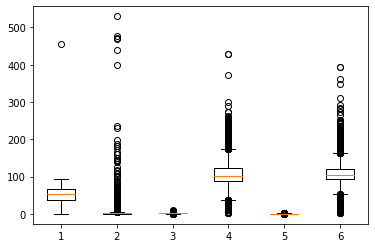

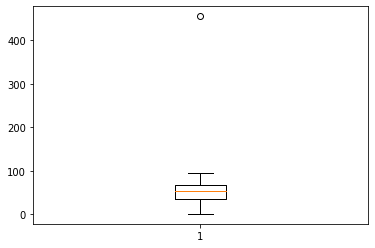

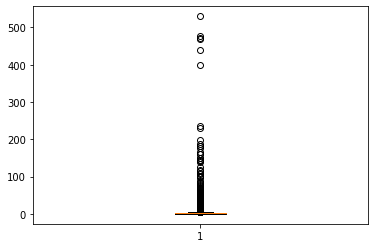

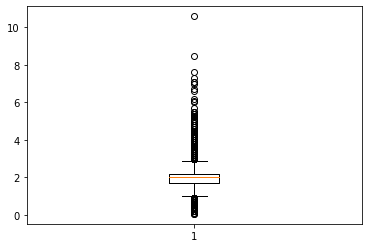

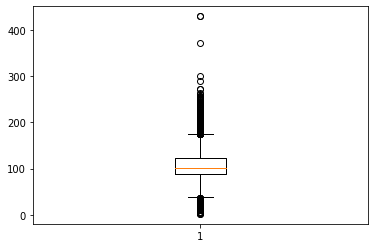

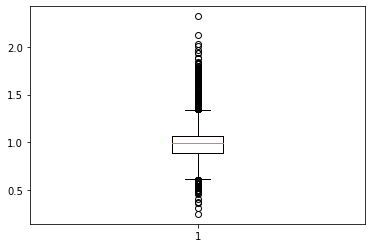

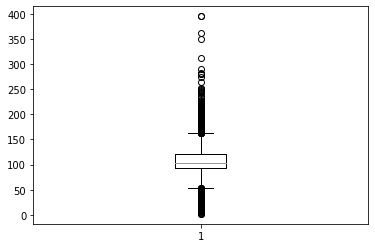

In [129]:
#Diagrama de cajas y bigotes para atributos numéricos (comparacion)
plt.boxplot((data2['age'],data2['TSH'],data2['T3'],data2['TT4'],data2['T4U'], data2['FTI']))
plt.show()
#En qué atributos hay datos atípicos? (diagrama de cajas individuales)
plt.boxplot(data2['age'])
plt.show()
plt.boxplot(data2['TSH'])
plt.show()
plt.boxplot(data2['T3'])
plt.show()
plt.boxplot(data2['TT4'])
plt.show()
plt.boxplot(data2['T4U'])
plt.show()
plt.boxplot(data2['FTI'])
plt.show()

In [130]:
data2.corr()

,age,TSH,T3,TT4,T4U,FTI
age,1.000000,-0.049532,-0.214443,-0.034096,-0.156906,0.058377
TSH,-0.049532,1.000000,-0.149193,-0.258150,0.071846,-0.288433
T3,-0.214443,-0.149193,1.000000,0.507861,0.407297,0.307235
TT4,-0.034096,-0.258150,0.507861,1.000000,0.426671,0.781969
T4U,-0.156906,0.071846,0.407297,0.426671,1.000000,-0.172290
FTI,0.058377,-0.288433,0.307235,0.781969,-0.172290,1.000000


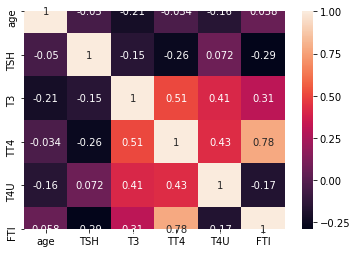

In [131]:
sns.heatmap(data2.corr(), square=True, annot=True)

In [196]:
#Mapeo de los datos clasificadores, para separarlos entre sick y negative(quitando los números, pues no aportan valor alguno)
data2['sick-negative.|classes'] = list(map(lambda x:x.split('.')[0],data2['sick-negative.|classes']))
data2

,age,sex,on-thyroxine,query-on-thyroxine,on-antithyroid-medication,sick,pregnant,thyroid-surgery,I131-treatment,query-hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral-source,sick-negative.|classes
0,41.0,F,f,f,f,f,f,f,f,f,...,f,f,f,1.30,2.5,125.0,1.14,109.0,SVHC,negative
1,23.0,F,f,f,f,f,f,f,f,f,...,f,f,f,4.10,2.0,102.0,0.99,100.0,other,negative
2,46.0,M,f,f,f,f,f,f,f,f,...,f,f,f,0.98,2.0,109.0,0.91,120.0,other,negative
3,70.0,F,t,f,f,f,f,f,f,f,...,f,f,f,0.16,1.9,175.0,0.99,100.0,other,negative
4,70.0,F,f,f,f,f,f,f,f,f,...,f,f,f,0.72,1.2,61.0,0.87,70.0,SVI,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,30.0,F,f,f,f,f,f,f,f,f,...,t,f,f,0.20,2.0,101.0,0.99,100.0,other,negative
968,68.0,F,f,f,f,f,f,f,f,f,...,f,f,f,1.00,2.1,124.0,1.08,114.0,SVI,negative
969,74.0,F,f,f,f,f,f,f,f,f,...,f,f,f,5.10,1.8,112.0,1.07,105.0,other,negative
970,72.0,M,f,f,f,f,f,f,f,f,...,f,f,f,0.70,2.0,82.0,0.94,87.0,SVI,negative


In [197]:
#Cuantos registros hay por cada valor del atributo clasificador
print(data2['sick-negative.|classes'].value_counts())

negative    3541
sick         231
Name: sick-negative.|classes, dtype: int64


In [198]:
#Eliminar datos atípicos de age (Solo hay un dato con edad mayor a 400)
elim = []
for index, row in data2.iterrows():
    if(row['age']>=400):
        elim.append(index)
data2 = data2.drop(elim,axis=0)
data2

,age,sex,on-thyroxine,query-on-thyroxine,on-antithyroid-medication,sick,pregnant,thyroid-surgery,I131-treatment,query-hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral-source,sick-negative.|classes
0,41.0,F,f,f,f,f,f,f,f,f,...,f,f,f,1.30,2.5,125.0,1.14,109.0,SVHC,negative
1,23.0,F,f,f,f,f,f,f,f,f,...,f,f,f,4.10,2.0,102.0,0.99,100.0,other,negative
2,46.0,M,f,f,f,f,f,f,f,f,...,f,f,f,0.98,2.0,109.0,0.91,120.0,other,negative
3,70.0,F,t,f,f,f,f,f,f,f,...,f,f,f,0.16,1.9,175.0,0.99,100.0,other,negative
4,70.0,F,f,f,f,f,f,f,f,f,...,f,f,f,0.72,1.2,61.0,0.87,70.0,SVI,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,30.0,F,f,f,f,f,f,f,f,f,...,t,f,f,0.20,2.0,101.0,0.99,100.0,other,negative
968,68.0,F,f,f,f,f,f,f,f,f,...,f,f,f,1.00,2.1,124.0,1.08,114.0,SVI,negative
969,74.0,F,f,f,f,f,f,f,f,f,...,f,f,f,5.10,1.8,112.0,1.07,105.0,other,negative
970,72.0,M,f,f,f,f,f,f,f,f,...,f,f,f,0.70,2.0,82.0,0.94,87.0,SVI,negative


In [199]:
#Convertir los atributos categóricos a numéricos
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data2 = data2.apply(le.fit_transform) 
print(data2['sick-negative.|classes'].value_counts())

0    3540
1     231
Name: sick-negative.|classes, dtype: int64


In [200]:
#Balancear los datos, replicando 2 veces los datos "sick" y disminuyendo los datos "negative" hasta igualar
listaTmp = [data2]
for class_index, group in data2.groupby('sick-negative.|classes'):
    if class_index == 1:
        listaTmp.append(group.sample(len(group)*2, replace=True))
dataTmp = pd.concat(listaTmp)

# Preparación de conjunto alterno con balanceo entre clases 60-40
g = dataTmp.groupby('sick-negative.|classes')
dataBal = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))
dataBal

age  sex  on-thyroxine  query-on-thyroxine  \
sick-negative.|classes                                                   
0                      0     19    0             1                   0   
                       1     35    1             0                   0   
                       2     56    1             0                   0   
                       3     80    0             0                   0   
                       4     24    0             0                   0   
...                         ...  ...           ...                 ...   
1                      688   70    0             0                   0   
                       689   56    0             0                   0   
                       690   74    0             0                   0   
                       691   68    1             0                   0   
                       692   56    0             0                   0   

                            on-antithyroid-medication  sick  pregnant  \
sick-negative.|classes                                                  
0                      0                            0     0         0   
                       1                            0     0         0   
                       2                            0     0         0   
                       3                            0     1         0   
                       4                            0     0         0   
...                                               ...   ...       ...   
1                      688                          0     0         0   
                       689                          0     1         0   
                       690                          0     0         0   
                       691                          0     0         0   
                       692                          0     0         0   

                            thyroid-surgery  I131-treatment  \
sick-negative.|classes                                        
0                      0                  0               0   
                       1                  0               0   
                       2                  0               0   
                       3                  0               0   
                       4                  0               0   
...                                     ...             ...   
1                      688                0               0   
                       689                0               0   
                       690                0               0   
                       691                0               0   
                       692                0               0   

                            query-hypothyroid  ...  tumor  hypopituitary  \
sick-negative.|classes                         ...                         
0                      0                    0  ...      0              0   
                       1                    0  ...      0              0   
                       2                    0  ...      0              0   
                       3                    0  ...      0              0   
                       4                    0  ...      0              0   
...                                       ...  ...    ...            ...   
1                      688                  0  ...      0              0   
                       689                  0  ...      0              0   
                       690                  0  ...      0              0   
                       691                  0  ...      0              0   
                       692                  0  ...      0              0   

                            psych  TSH  T3  TT4  T4U  FTI  referral-source  \
sick-negative.|classes                                                       
0                      0        0   25  21  147   63  137                4   
                       1        0  122  21   77   43   87               

In [201]:
#verificar el balanceo de los datos
print(dataBal['sick-negative.|classes'].value_counts())

1    693
0    693
Name: sick-negative.|classes, dtype: int64


In [202]:
#Separación de conjunto de entrenamiento y de prueba
from sklearn.model_selection import train_test_split

trainTest = train_test_split(dataBal, shuffle=True)
entrenamiento = trainTest[0]
prueba = trainTest[1]

In [203]:
# x: Conjunto de datos sin el atributo clasificador
# y:Conjunto del atributo clasificador
x_train = np.array(entrenamiento.drop(['sick-negative.|classes'],1))
y_train = np.array(entrenamiento['sick-negative.|classes'])

x_test = np.array(prueba.drop(['sick-negative.|classes'],1))
y_test = np.array(prueba['sick-negative.|classes'])

In [204]:
#CLASIFICADOR POR REGRESION LINEAL
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

#Las predicciones se calculan en decimales
y_predRegLin = regressor.predict(x_test)

In [205]:
from sklearn.metrics import roc_curve
#Se debe calcular el umbral para poder modificar las predicciones

ROC = roc_curve(y_test,y_predRegLin)
#roc_curve calcula una lista de umbrales junto con el numero de falsos positivos y verdaderos positivos

falsosPosit, verdaderosPosit, listaUmbrales = ROC[0],ROC[1],ROC[2]

#Se calcula el umbral optimo
optimo = np.argmax(verdaderosPosit - falsosPosit)
umbral,y = listaUmbrales[optimo],[]

#Se modifican las predicciones para convertirlas en binarias
for i in y_predRegLin:
    if(i<=umbral):
        y.append(0)
    else:
        y.append(1)
y_aprox = np.array(y)

In [206]:
#Calcular matriz de confusion para regresion lineal
from sklearn.metrics import confusion_matrix

matriz = confusion_matrix(y_test,y_aprox)
matriz

array([[167,  13],
       [ 21, 146]], dtype=int64)

In [207]:
#Calcular precision para regresion lineal
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_aprox)
precision

0.9182389937106918

In [208]:
#Calcular recall para regresion lineal
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_aprox)
recall

0.874251497005988

In [209]:
#Calcular f1Score para regresion lineal
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_aprox)
f1

0.8957055214723927

In [210]:
#CLASIFICADOR POR REGRESION LOGISTICA
from sklearn import linear_model
modelLogis = linear_model.LogisticRegression(max_iter = 500)
modelLogis.fit(x_train,y_train)

#Entrenamiento de los datos:
predLogis = modelLogis.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [211]:
#Calcular matriz de confusion para regresion logistica
from sklearn.metrics import confusion_matrix

matriz = confusion_matrix(y_test,predLogis)
matriz

array([[155,  25],
       [ 15, 152]], dtype=int64)

In [212]:
#Calcular precision para regresion logistica
from sklearn.metrics import precision_score

precision = precision_score(y_test, predLogis)
precision

0.8587570621468926

In [213]:
#Calcular recall para regresion logistica
from sklearn.metrics import recall_score

recall = recall_score(y_test, predLogis)
recall

0.9101796407185628

In [214]:
#Calcular f1Score para regresion logistica
from sklearn.metrics import f1_score

f1 = f1_score(y_test, predLogis)
f1

0.8837209302325582

In [215]:
#K VECINOS MAS CERCANOS (K=5)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(5)
knn.fit(x_train, y_train)

#Entrenamiento de los datos:
predK = knn.predict(x_test)

In [216]:
#Calcular matriz de confusion para k vecinos
from sklearn.metrics import confusion_matrix

matriz = confusion_matrix(y_test,predK)
matriz

array([[137,  43],
       [  9, 158]], dtype=int64)

In [217]:
#Calcular precision para k vecinos
from sklearn.metrics import precision_score

precision = precision_score(y_test, predK)
precision

0.7860696517412935

In [218]:
#Calcular recall para k vecinos
from sklearn.metrics import recall_score

recall = recall_score(y_test, predK)
recall

0.9461077844311377

In [219]:
#Calcular f1Score para k vecinos
from sklearn.metrics import f1_score

f1 = f1_score(y_test, predK)
f1

0.8586956521739131

In [220]:
#ANALISIS DISCRIMINANTE LINEAL
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
discLineal = LinearDiscriminantAnalysis()
discLineal.fit(x_train, y_train)

predDiscLineal = discLineal.predict(x_test)

In [221]:
#Calcular matriz de confusion para discriminante lineal
from sklearn.metrics import confusion_matrix

matriz = confusion_matrix(y_test,predDiscLineal)
matriz

array([[154,  26],
       [ 11, 156]], dtype=int64)

In [222]:
#Calcular precision para discriminante lineal
from sklearn.metrics import precision_score

precision = precision_score(y_test, predDiscLineal)
precision

0.8571428571428571

In [223]:
#Calcular recall para discriminante lineal
from sklearn.metrics import recall_score

recall = recall_score(y_test, predDiscLineal)
recall

0.9341317365269461

In [224]:
#Calcular f1Score para discriminante lineal
from sklearn.metrics import f1_score

f1 = f1_score(y_test, predDiscLineal)
f1

0.8939828080229226